## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [3436]:
# <UZUPEŁNIJ>
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

all_data = pd.DataFrame(np.vstack((train, test)))
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36.0,1.0,0.39093,1.1025,0.73351,0.72022,0.69474,0.17954,0.076072,1.053200,0.059213,0.157470,0.024197,0.009541,0.000247,1.20420
1,5.0,4.0,0.93671,2.4151,0.72980,0.81793,0.86491,0.33439,0.080539,1.180500,0.048722,0.120510,0.014314,0.003998,0.000372,1.30830
2,29.0,1.0,0.83750,1.9512,0.49050,0.96800,0.98246,0.65138,0.016224,0.047908,0.005119,0.035621,0.001267,0.000322,0.000011,0.23514
3,35.0,3.0,0.90755,2.5820,0.62394,0.96837,0.99825,0.55674,0.031714,0.183050,0.079387,0.162130,0.025613,0.007412,0.000699,1.69510
4,32.0,7.0,0.88485,2.2398,0.55754,0.97997,0.99825,0.67974,0.009129,0.015166,0.025658,0.087206,0.007548,0.002152,0.000179,0.75154


In [3437]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 0:
            if df[feature_name].dtype == 'float64' or df[feature_name].dtype == 'int32':
                max_value = df[feature_name].max()
                min_value = df[feature_name].min()
                result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


# train = normalize(pd.DataFrame(train))
# test = normalize(pd.DataFrame(test))
train = pd.DataFrame(train)
test = pd.DataFrame(test)

columns = ["class"]
for i in range(1, 16):
    columns.append('feature_' +str (i))

train.columns = columns
test.columns = columns

all_data.columns = columns

# train = pd.DataFrame(train)
# test = pd.DataFrame(test)
train.head()

,class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,36.0,1.0,0.39093,1.1025,0.73351,0.72022,0.69474,0.17954,0.076072,1.053200,0.059213,0.157470,0.024197,0.009541,0.000247,1.20420
1,5.0,4.0,0.93671,2.4151,0.72980,0.81793,0.86491,0.33439,0.080539,1.180500,0.048722,0.120510,0.014314,0.003998,0.000372,1.30830
2,29.0,1.0,0.83750,1.9512,0.49050,0.96800,0.98246,0.65138,0.016224,0.047908,0.005119,0.035621,0.001267,0.000322,0.000011,0.23514
3,35.0,3.0,0.90755,2.5820,0.62394,0.96837,0.99825,0.55674,0.031714,0.183050,0.079387,0.162130,0.025613,0.007412,0.000699,1.69510
4,32.0,7.0,0.88485,2.2398,0.55754,0.97997,0.99825,0.67974,0.009129,0.015166,0.025658,0.087206,0.007548,0.002152,0.000179,0.75154


In [3438]:
max_k = 3

klasy = train['class'].unique()
klasy = np.sort(klasy)
print(np.sort(klasy[:4]))

cechy = columns
if 'class' in cechy:
    cechy .remove('class')
print(cechy)

[1. 2. 3. 4.]
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [3439]:
class_split = []

for klasa in klasy:
    class_split.append(train[train['class'] == klasa])

for c in class_split:
    c.reset_index()

In [3440]:
mis = []

for c in class_split:
    mis.append(c.drop(columns=['class']).mean())

In [3441]:
mis[0]

feature_1     6.428571
feature_2     0.804830
feature_3     1.703670
feature_4     0.425848
feature_5     0.973543
feature_6     0.993903
feature_7     0.773865
feature_8     0.005800
feature_9     0.003875
feature_10    0.020380
feature_11    0.071542
feature_12    0.006158
feature_13    0.001868
feature_14    0.000103
feature_15    0.583332
dtype: float64

In [3442]:
def covariation_matrix(x: np.array):

    mean = x.mean().to_numpy()
    x = x.to_numpy()
    n = x.shape[0]

    mo = x - mean

    sumator = mo.T @ mo

    sumator /= (n - 1)

    return sumator

In [3443]:
cov1 = np.cov(class_split[0].drop(columns=['class']).T)

In [3444]:
cov2 = covariation_matrix(class_split[0].drop(columns=['class']))

In [3445]:
cov1.all() == cov2.all()

True

In [3446]:
def edist_euclidean(x, mi, n, features_list):
    mi = mi[features_list]
    mi = mi.to_numpy(dtype='float64')
    mi = np.reshape(mi, (len(mi), 1))
    x = x.drop('index')
    x = x[features_list]
    x = x.to_numpy(dtype='float64')
    x = np.reshape(x, (len(x), 1))

    xx = x - mi

    return (1/(n-1)) * (xx.T @ xx)

In [3447]:
def predict(mi_list, df_test, features_list, k_neighbours):
    predictions = []
    n = len(df_test)
    for i in df_test.index:
        points = []
        for idx, j in enumerate(mi_list, start=1):
            test_row = df_test.iloc[i]
            current = (edist_euclidean(test_row, j[0], n, features_list), j[1])
            # print(test_row)
            # print(train_row)
            # # print(current)
            points.append(current)
        points = sorted(points, key=lambda x: x[0])
        predictions.append(points[0][1])
    return np.array(predictions)

In [3448]:
def plot2d(train_df, class1, class2, feature1, feature2, test_df=None, miss=None):

    plt.figure(figsize=(10, 10))

    t1 = train_df[train_df['class'] == class1]
    t2 = train_df[train_df['class'] == class2]

    plt.scatter(t1[feature1], t1[feature2], c='blue', label='Training class ' + str(class1))
    plt.scatter(t2[feature1], t2[feature2], c='orange', label='Training class  ' + str(class2))

    if test_df is not None:
        p1 = test_df[test_df['observed'] == class1]
        p2 = test_df[test_df['observed'] == class2]

        plt.scatter(p1[feature1], p1[feature2], c='blue', marker='x', label='Test class ' + str(class1))
        plt.scatter(p2[feature1], p2[feature2], c='orange', marker='x', label='Test class ' + str(class2))

    if miss is not None:
        m1 = miss[0][0]
        m2 = miss[1][0]


        plt.scatter(m1[feature1], m1[feature2], s=1000, c='red', marker='+', label='Mi of class ' + str(class1))
        plt.scatter(m2[feature1], m2[feature2], s=1000, c='yellow', marker='+', label='Mi of class ' + str(class2))

    plt.legend()

In [3449]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

def show_statistics(true, pred, classes):
    cm = confusion_matrix(true, pred)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap='binary')
    print('Accuracy:', accuracy_score(true, pred))
    bac = balanced_accuracy_score(true, pred)
    print('Balanced accuracy:', bac)
    f1s = f1_score(true, pred, average='micro')
    print('F1 score:', f1s)

    return bac, f1s

In [3450]:
def evaluate_model(classes, features, k):
    wybrane_klasy = classes
    wybrane_cechy = features

    train_filtered = train[train['class'].isin(wybrane_klasy)]
    test_filtered = test[test['class'].isin(wybrane_klasy)]
    mis_filtered = []

    for kk in wybrane_klasy:
        mis_filtered.append((train[train['class'] == kk].mean(), kk))

    train_filtered = train_filtered.reset_index()
    test_filtered = test_filtered.reset_index()

    prediction = predict(mis_filtered, test_filtered, wybrane_cechy, k)

    predicted_test = test_filtered
    predicted_test['observed'] = prediction

    if len(classes) == 2 and len(features) == 2:
        plot2d(train_filtered, classes[0], classes[1], features[0], features[1], predicted_test, mis_filtered)

    return show_statistics(predicted_test['class'], predicted_test['observed'], wybrane_klasy)

In [3451]:
def edist_mahalanobis(x, mi, c, features_list):
    mi = mi[features_list]
    mi = mi.to_numpy(dtype='float64')
    mi = np.reshape(mi, (len(mi), 1))
    x = x.drop('index')
    x = x[features_list]
    x = x.to_numpy(dtype='float64')
    x = np.reshape(x, (len(x), 1))
    cinv = inv(c)
    xx = x - mi

    return np.sqrt(xx.T @ cinv @ xx)


def predict_mahalanobis(mi_list, df_test, cov, features_list):
    predictions = []
    for i in df_test.index:
        points = []
        for idx, j in enumerate(mi_list, start=1):
            test_row = df_test.iloc[i]
            current = (edist_mahalanobis(test_row, j[0], cov, features_list), j[1])
            points.append(current)
        points = sorted(points, key=lambda x: x[0])
        predictions.append(points[0][1])
    return np.array(predictions)

In [3452]:
def evaluate_model_mahalanobis(classes, features, k):
    wybrane_klasy = classes
    wybrane_cechy = features

    train_filtered = train[train['class'].isin(wybrane_klasy)]
    test_filtered = test[test['class'].isin(wybrane_klasy)]
    mis_filtered = []

    for kk in wybrane_klasy:
        mis_filtered.append((train[train['class'] == kk].mean(), kk))

    train_filtered = train_filtered.reset_index()
    test_filtered = test_filtered.reset_index()

    new_cov = np.cov(test_filtered[features].T)

    prediction = predict_mahalanobis(mis_filtered, test_filtered, new_cov, wybrane_cechy)

    predicted_test = test_filtered
    predicted_test['observed'] = prediction

    if len(classes) == 2 and len(features) == 2:
        plot2d(train_filtered, classes[0], classes[1], features[0], features[1], predicted_test, mis_filtered)

    return show_statistics(predicted_test['class'], predicted_test['observed'], wybrane_klasy)

In [3453]:
models = []

Accuracy: 1.0
Balanced accuracy: 1.0
F1 score: 1.0


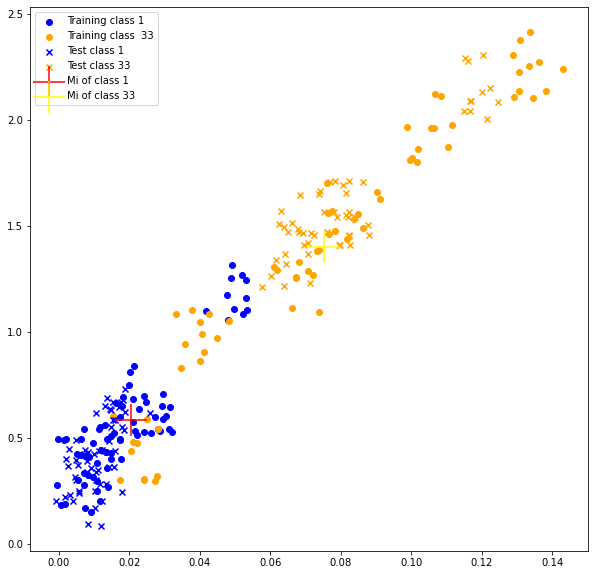

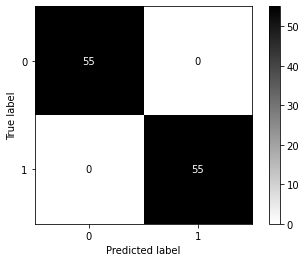

In [3454]:
klasy_w = [1, 33]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.8909090909090909
Balanced accuracy: 0.8909090909090909
F1 score: 0.8909090909090909


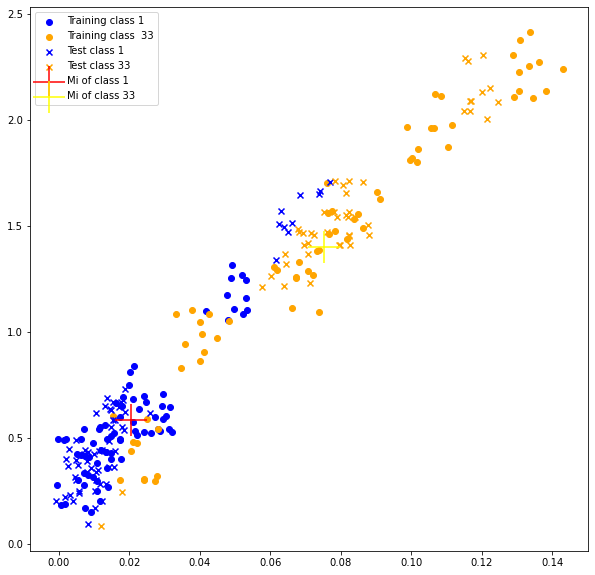

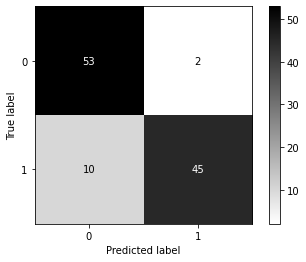

In [3455]:
klasy_w = [1, 33]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 1.0
Balanced accuracy: 1.0
F1 score: 1.0


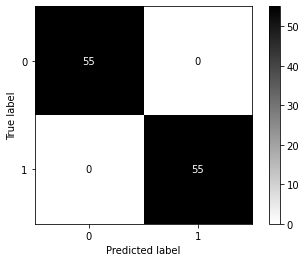

In [3456]:
klasy_w = [1, 33]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.7272727272727273
Balanced accuracy: 0.7272727272727273
F1 score: 0.7272727272727273


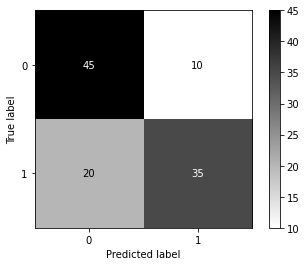

In [3457]:
klasy_w = [1, 33]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 1.0
Balanced accuracy: 1.0
F1 score: 1.0


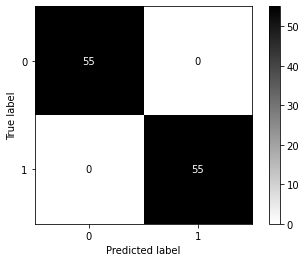

In [3458]:
klasy_w = [1, 33]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.7909090909090909
Balanced accuracy: 0.7909090909090909
F1 score: 0.7909090909090909


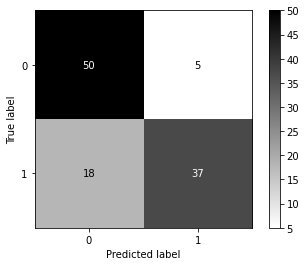

In [3459]:
klasy_w = [1, 33]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 2

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.6698564593301436
Balanced accuracy: 0.6579545454545455
F1 score: 0.6698564593301436


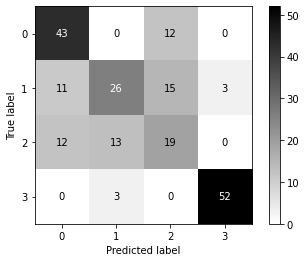

In [3460]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.6842105263157895
Balanced accuracy: 0.6875
F1 score: 0.6842105263157895


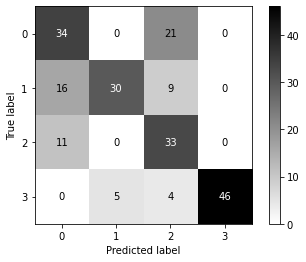

In [3461]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.7942583732057417
Balanced accuracy: 0.7875
F1 score: 0.7942583732057417


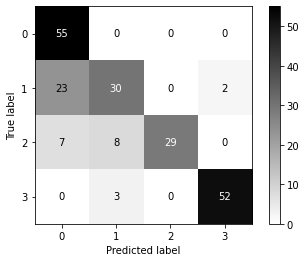

In [3462]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.7416267942583732
Balanced accuracy: 0.7375
F1 score: 0.7416267942583733


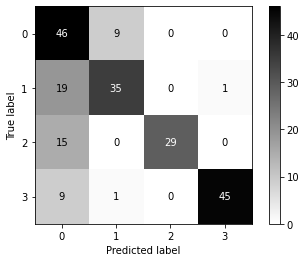

In [3463]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.7990430622009569
Balanced accuracy: 0.7920454545454545
F1 score: 0.7990430622009569


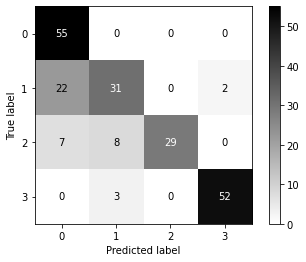

In [3464]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))


Accuracy: 0.8181818181818182
Balanced accuracy: 0.8238636363636364
F1 score: 0.8181818181818182


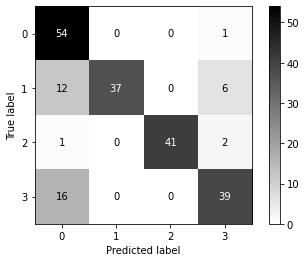

In [3465]:
klasy_w = [1, 33, 6, 3]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 4

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.337995337995338
Balanced accuracy: 0.3362689393939394
F1 score: 0.337995337995338


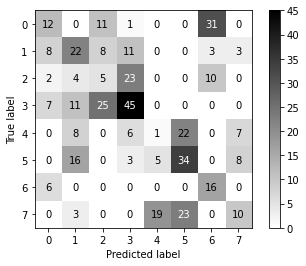

In [3466]:
klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

Accuracy: 0.4195804195804196
Balanced accuracy: 0.4101325757575758
F1 score: 0.4195804195804196


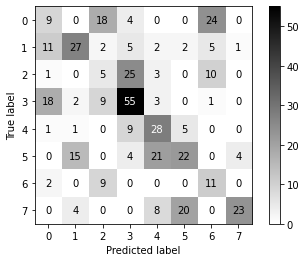

In [3467]:

klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))


Accuracy: 0.48951048951048953
Balanced accuracy: 0.4777462121212121
F1 score: 0.48951048951048953


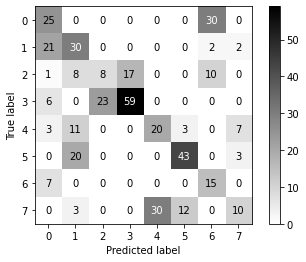

In [3468]:
klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))


Accuracy: 0.6223776223776224
Balanced accuracy: 0.6225378787878788
F1 score: 0.6223776223776224


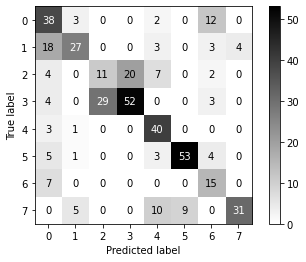

In [3469]:
klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15, 4, 6]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))


Accuracy: 0.4965034965034965
Balanced accuracy: 0.48371212121212115
F1 score: 0.4965034965034965


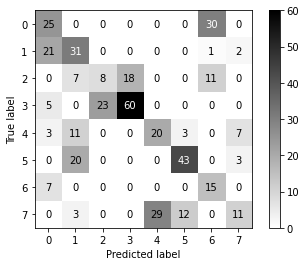

In [3470]:
klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))


Accuracy: 0.7319347319347319
Balanced accuracy: 0.7228219696969697
F1 score: 0.7319347319347319


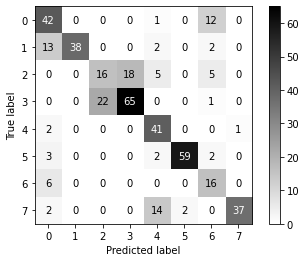

In [3471]:

klasy_w = [1, 33, 6, 3, 11, 13, 14, 29]
featury = [10, 15, 4, 6, 8, 11, 12, 13]
featury = ['feature_' + str(x) for x in featury]
k = 8

bas, f1s = evaluate_model_mahalanobis(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)
models.append((bas, f1s, k, name))

# Wnioski

Obie odleglosci, euklidesowa i mahalanobisa, poradzily sobie porownywalnie lepiej niz sam klasyfikator kNN. Euklidesowa odleglosc NM radzila sobie lepiej kiedy probki byly znormalizowane i nie byly ze soba skorelowane. Natomiast odleglosc mahalanobisa radzila sobie lepiej dla probek nieznormalizowanych i przy wiekszej ich korelacji